In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

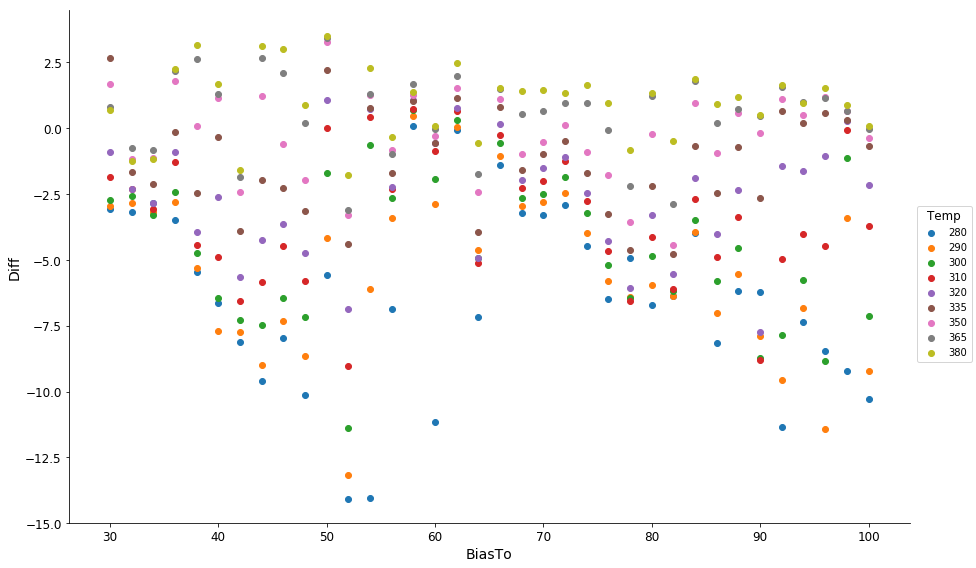

In [4]:
data = pd.read_feather("/Users/weilu/Research/server/apr_2018/eleventh/force_0.02_rg_0.15_lipid_1.0_mem_1_go_0.8_kbin0.2/rerun_1_22_Apr_164742.feather")
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun1 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

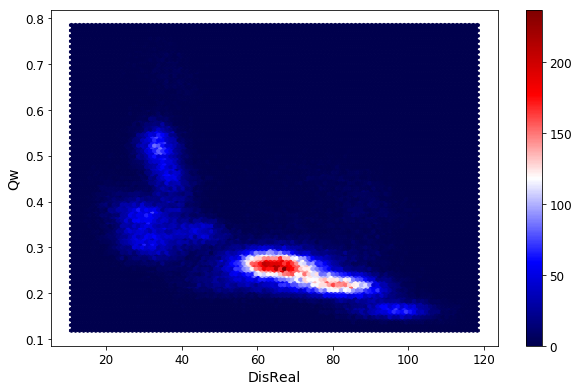

In [3]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

In [8]:
rerun1.query("Temp == 300").groupby(["BiasTo", "Run"])["Qw"].describe().query("count > 500")

count      mean       std       min       25%       50%       75%  \
BiasTo Run                                                                      
100.0  5    506.0  0.216357  0.014690  0.172837  0.206259  0.216141  0.226243   
       11   516.0  0.210637  0.015261  0.163157  0.200403  0.211081  0.221180   
30.0   0    512.0  0.313301  0.023439  0.244492  0.297131  0.312719  0.328752   
       9    516.0  0.319756  0.024100  0.244715  0.303547  0.320334  0.334956   
34.0   7    595.0  0.466710  0.063654  0.347506  0.405904  0.482768  0.521813   
36.0   9    618.0  0.391471  0.027943  0.283143  0.375910  0.393299  0.411667   
       11   606.0  0.323916  0.036891  0.213862  0.296299  0.323732  0.351953   
38.0   7    644.0  0.400142  0.062318  0.293096  0.339789  0.399410  0.459375   
40.0   3    572.0  0.349259  0.056752  0.195801  0.349502  0.369797  0.383861   
44.0   4    814.0  0.454932  0.021479  0.371641  0.441357  0.455831  0.469986   
46.0   3    577.0  0.444559  0.108998  0.210958  0.343687  0.495271  0.525818   
       7    618.0  0.435697  0.111887  0.212281  0.327658  0.497644  0.523339   
48.0   7    573.0  0.401093  0.071991  0.211570  0.369551  0.417830  0.448868   
       9    528.0  0.401808  0.062724  0.282455  0.336236  0.425672  0.455361   
52.0   1    580.0  0.445878  0.086359  0.293004  0.347339  0.487897  0.517272   
       11   608.0  0.505438  0.036504  0.325882  0.490816  0.508768  0.526811   
54.0   1    536.0  0.282771  0.032300  0.221668  0.260420  0.272512  0.300227   
68.0   7    577.0  0.267446  0.016779  0.223816  0.255425  0.267379  0.277609   
84.0   2    580.0  0.223719  0.022724  0.175245  0.207648  0.220131  0.234820   
86.0   4    587.0  0.226237  0.015251  0.181017  0.216315  0.225317  0.236615   
88.0   10   505.0  0.315010  0.029103  0.224671  0.294474  0.315158  0.334748   
90.0   0    639.0  0.267301  0.021522  0.211732  0.253415  0.264180  0.277365   
       1    514.0  0.217585  0.015990  0.173481  0.207218  0.216395  0.226575   
       11   508.0  0.404503  0.039564  0.244786  0.380940  0.403582  0.428980   
92.0   1    541.0  0.223657  0.014710  0.183545  0.213560  0.223213  0.233654   
       6    630.0  0.217088  0.014693  0.177986  0.206489  0.216403  0.226161   
94.0   8    501.0  0.222232  0.014868  0.174978  0.211372  0.222404  0.233221   
       9    501.0  0.225000  0.015779  0.176904  0.215587  0.225167  0.234516   
       10   574.0  0.196620  0.015723  0.144227  0.188918  0.197666  0.206466   
96.0   5    592.0  0.266028  0.020202  0.213629  0.252188  0.263746  0.276090   
       7    848.0  0.229225  0.023393  0.175350  0.211512  0.226266  0.244797   

                 max  
BiasTo Run            
100.0  5    0.259131  
       11   0.260233  
30.0   0    0.390767  
       9    0.403975  
34.0   7    0.587433  
36.0   9    0.464441  
       11   0.422314  
38.0   7    0.512556  
40.0   3    0.434637  
44.0   4    0.511157  
46.0   3    0.598831  
       7    0.584283  
48.0   7    0.784118  
       9    0.505249  
52.0   1    0.592568  
       11   0.580052  
54.0   1    0.376545  
68.0   7    0.321494  
84.0   2    0.294107  
86.0   4    0.276170  
88.0   10   0.407041  
90.0   0    0.345181  
       1    0.300204  
       11   0.512322  
92.0   1    0.261154  
       6    0.267052  
94.0   8    0.270447  
       9    0.275021  
       10   0.237054  
96.0   5    0.332621  
       7    0.301334

In [ ]:
rerun5.query("Temp == 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)